In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in csv #

In [7]:
fac = pd.read_csv('../data/capstone_VA_HCfacilities.csv')

# Observe the first few rows to ensure no errors - Completed data cleaning in excel to correct the lat, lng values as well as some of the states listed to reflect the correct VA location #

In [9]:
fac.head()

,Facility ID,Facility Name,Address,City/Town,lat,lng,State,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote
0,38004F,VA ROSEBURG HEALTHCARE SYSTEM,913 NW GARDEN VALLEY BLVD.,"Roseburg, Oregon",43.2181,-123.3561,OR,97471,DOUGLAS,(541) 440-1000,Acute Care - Veterans Administration,Veterans Health Administration,Yes,Not Available,16.0
1,38003F,PORTLAND VA MEDICAL CENTER,3710 SW US VETERANS HOSPITAL,"Portland, Oregon",45.5167,-122.6667,OR,97239,MULTNOMAH,(503) 220-8262,Acute Care - Veterans Administration,Veterans Health Administration,Yes,5,NaN
2,05130F,SAN FRANCISCO VA MEDICAL CENTER,4150 CLEMENT STREET,San Francisco,37.7775,-122.4164,CA,94121,SAN FRANCISCO,(415) 221-4810,Acute Care - Veterans Administration,Veterans Health Administration,Yes,3,NaN
3,50030F,SEATTLE VA MEDICAL CENTER (VA PUGET SOUND HEAL...,1660 S. COLUMBIAN WAY,Seattle,47.6062,-122.3321,WA,98108,KING,(206) 764-2299,Acute Care - Veterans Administration,Veterans Health Administration,Yes,4,NaN
4,05031F,PALO ALTO VA MEDICAL CENTER,3801 MIRANDA AVENUE,"Palo Alto, California",37.4292,-122.1381,CA,94304,SANTA CLARA,(650) 858-3939,Acute Care - Veterans Administration,Veterans Health Administration,Yes,5,NaN


In [35]:
fac = fac.sort_values(by = 'State')

In [37]:
fac['State'].unique()

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [128]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

## Load in the JSON file which will serve as the shape of our US map ##

In [13]:
states = gpd.read_file('../data/states.json')
print(states.crs)
states.head( )

EPSG:4326


,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.6065, -70.82374 4..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11578, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.0577 44.99743, -104.25014 44.99..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.0506 37.0004, -114.05 36.95777,..."


In [39]:
states = states.sort_values(by = 'STATE')

In [83]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
18,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-85.00237 31.00068, -85.02411 ..."
19,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-164.9762 54.1346, -164.93777 ..."
20,0400000US04,04,Arizona,,113594.084,"POLYGON ((-109.04522 36.99908, -109.04524 36.9..."
21,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.55929 36.4995, -94.51948 36.4992..."
22,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.44632 37.86105, -122.4385..."


## NOTE: Dropping Alaska and Hawaii from the JSON dataframe, because these states are not represented in the VA Acute Care facilities list. This capstone will cover the contiguous US only ##

In [118]:
cont_us = states.drop([19, 29, 16])

In [120]:
cont_us.head(51)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
18,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-85.00237 31.00068, -85.02411 ..."
20,0400000US04,04,Arizona,,113594.084,"POLYGON ((-109.04522 36.99908, -109.04524 36.9..."
21,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.55929 36.4995, -94.51948 36.4992..."
22,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.44632 37.86105, -122.4385..."
23,0400000US08,08,Colorado,,103641.888,"POLYGON ((-102.04224 36.99308, -102.0545 36.99..."
24,0400000US09,09,Connecticut,,4842.355,"MULTIPOLYGON (((-71.85957 41.3224, -71.86824 4..."
25,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.55945 39.62981, -75.5591 3..."
26,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.0386 38.79151, -77.0389 38.80081..."
27,0400000US12,12,Florida,,53624.759,"MULTIPOLYGON (((-85.15642 29.67963, -85.1374 2..."
28,0400000US13,13,Georgia,,57513.485,"POLYGON ((-81.44412 30.70971, -81.44872 30.709..."


# Checking the 0 index state just to test and make sure the borders are accurate # 

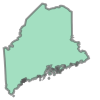

In [122]:
cont_us.loc[0, 'geometry']

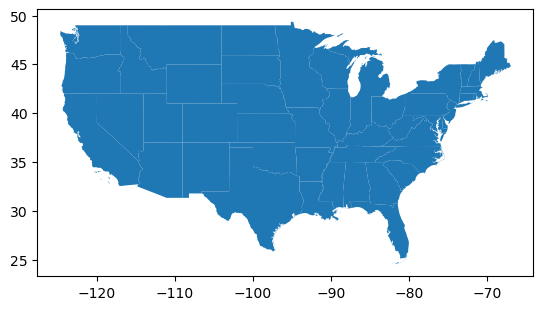

In [124]:
cont_us.plot();

In [132]:
fac_geo = gpd.GeoDataFrame(fac, 
                           crs = cont_us.crs, 
                           geometry = gpd.points_from_xy(fac.lng, fac.lat))

In [134]:
type(fac_geo)

geopandas.geodataframe.GeoDataFrame

In [136]:
fac_geo.head()

,Facility ID,Facility Name,Address,City/Town,lat,lng,State,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote,geometry
63,01021F,TUSCALOOSA VA MEDICAL CENTER,3701 LOOP ROAD EAST,"Tuscaloosa, Alabama",33.2067,-87.534700,AL,35404,TUSCALOOSA,(205) 554-2000,Acute Care - Veterans Administration,Veterans Health Administration,No,Not Available,16.0,POINT (-87.5347 33.2067)
64,01014F,BIRMINGHAM VA MEDICAL CENTER,700 SOUTH 19TH STREET,"Birmingham, Alabama",33.5175,-86.809444,AL,35233,JEFFERSON,(205) 933-4515,Acute Care - Veterans Administration,Veterans Health Administration,Yes,3,NaN,POINT (-86.80944 33.5175)
67,01019F,VA CENTRAL ALABAMA HEALTHCARE SYSTEM - MONTGOMERY,215 PERRY HILL ROAD,"Montgomery, Alabama",32.3617,-86.279200,AL,36109,MONTGOMERY,(334) 260-4100,Acute Care - Veterans Administration,Veterans Health Administration,Yes,5,NaN,POINT (-86.2792 32.3617)
40,04009F,FAYETTEVILLE AR VA MEDICAL CENTER,1100 N. COLLEGE AVENUE,"Fayetteville, Arkansas",36.0764,-94.160800,AR,72703,WASHINGTON,(479) 444-5058,Acute Care - Veterans Administration,Veterans Health Administration,Yes,5,NaN,POINT (-94.1608 36.0764)
46,04010F,VA CENTRAL AR. VETERANS HEALTHCARE SYSTEM LR,4300 WEST SEVENTH STREET,"Little Rock, Arkansas",34.7444,-92.288100,AR,72205,PULASKI,(501) 257-1000,Acute Care - Veterans Administration,Veterans Health Administration,Yes,2,NaN,POINT (-92.2881 34.7444)


In [138]:
join = gpd.sjoin(fac_geo, states, predicate = 'within')

In [140]:
join.head()

,Facility ID,Facility Name,Address,City/Town,lat,lng,State,ZIP Code,County/Parish,Telephone Number,...,Emergency Services,Hospital overall rating,Hospital overall rating footnote,geometry,index_right,GEO_ID,STATE,NAME,LSAD,CENSUSAREA
63,01021F,TUSCALOOSA VA MEDICAL CENTER,3701 LOOP ROAD EAST,"Tuscaloosa, Alabama",33.2067,-87.534700,AL,35404,TUSCALOOSA,(205) 554-2000,...,No,Not Available,16.0,POINT (-87.5347 33.2067),18,0400000US01,01,Alabama,,50645.326
64,01014F,BIRMINGHAM VA MEDICAL CENTER,700 SOUTH 19TH STREET,"Birmingham, Alabama",33.5175,-86.809444,AL,35233,JEFFERSON,(205) 933-4515,...,Yes,3,NaN,POINT (-86.80944 33.5175),18,0400000US01,01,Alabama,,50645.326
67,01019F,VA CENTRAL ALABAMA HEALTHCARE SYSTEM - MONTGOMERY,215 PERRY HILL ROAD,"Montgomery, Alabama",32.3617,-86.279200,AL,36109,MONTGOMERY,(334) 260-4100,...,Yes,5,NaN,POINT (-86.2792 32.3617),18,0400000US01,01,Alabama,,50645.326
40,04009F,FAYETTEVILLE AR VA MEDICAL CENTER,1100 N. COLLEGE AVENUE,"Fayetteville, Arkansas",36.0764,-94.160800,AR,72703,WASHINGTON,(479) 444-5058,...,Yes,5,NaN,POINT (-94.1608 36.0764),21,0400000US05,05,Arkansas,,52035.477
46,04010F,VA CENTRAL AR. VETERANS HEALTHCARE SYSTEM LR,4300 WEST SEVENTH STREET,"Little Rock, Arkansas",34.7444,-92.288100,AR,72205,PULASKI,(501) 257-1000,...,Yes,2,NaN,POINT (-92.2881 34.7444),21,0400000US05,05,Arkansas,,52035.477


In [142]:
join['State'].value_counts()

State
NY    9
CA    8
PA    7
FL    7
TX    6
IL    5
WV    4
MO    4
OH    4
MI    4
NC    4
MA    3
LA    3
AL    3
TN    3
GA    3
VA    3
WI    3
AZ    3
SC    2
SD    2
OR    2
OK    2
WA    2
NV    2
WY    2
IA    2
CO    2
AR    2
MS    2
MN    2
MD    2
KY    2
KS    2
IN    2
ND    1
CT    1
DC    1
VT    1
DE    1
UT    1
RI    1
ID    1
NE    1
PR    1
ME    1
NM    1
NJ    1
MT    1
Name: count, dtype: int64

In [144]:
fac_in_NY = join.loc[join['State'] == 'NY']
fac_in_NY.shape

(9, 22)

In [148]:
polygonNY = cont_us.loc[cont_us['NAME'] == 'New York']
polygonNY.shape

(1, 6)

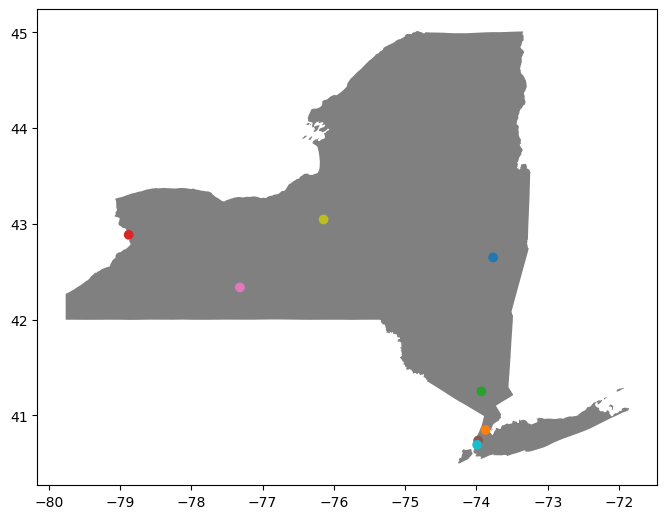

In [150]:
ax = polygonNY.plot(figsize = (8, 10), color = 'grey')
fac_in_NY.plot( ax = ax, column = 'Address');
plt.show();